In [13]:
import numpy as np
import pandas as pd
import cmath

In [14]:
%matplotlib widget
import matplotlib.pyplot as plt

### Импорт данных

In [15]:
np.array(range(1, 61))

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60])

In [16]:
list_of_angles_TE = [16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 65, 70, 75, 80]

list_of_angles_TM = [16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60]

Файлы с TE-поляризацией

In [17]:
first_app = True
for angle in list_of_angles_TE:
    file = str(angle) + '.s1p'
    temp_8A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\3oct\\SP_TE_inc0deg\\scan30deg\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\3oct\\SP_TE_inc0deg\\free\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_8A['Angle'] = angle
    temp_free['Angle'] = angle
    if first_app:
        data_8A_TE = temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]
        data_free_TE = temp_free.loc[temp_free['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_8A_TE = pd.concat([data_8A_TE, temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]], ignore_index=True)
        data_free_TE = pd.concat([data_free_TE, temp_free.loc[temp_free['Frequency'] == 25.0*1e9]], ignore_index=True)

In [18]:
first_app = True
for angle in list_of_angles_TM:
    file = str(angle) + '.s1p'
    temp_8A = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\3oct\\SP_TM_inc0deg\\scan30deg\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_free = pd.read_csv('C:\\Users\\isvoropaev\\Desktop\\python_codes\\post_processing_RIS\\3oct\\SP_TM_inc0deg\\free\\' + file,
                          sep=' ', header=None, skiprows=5, skipinitialspace=True, index_col=False,
                          names=['Frequency', 'ReS12', 'ImS12'])
    temp_8A['Angle'] = angle
    temp_free['Angle'] = angle
    if first_app:
        data_8A_TM = temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]
        data_free_TM = temp_free.loc[temp_free['Frequency'] == 25.0*1e9]
        first_app = False
    else:
        data_8A_TM = pd.concat([data_8A_TM, temp_8A.loc[temp_8A['Frequency'] == 25.0*1e9]], ignore_index=True)
        data_free_TM = pd.concat([data_free_TM, temp_free.loc[temp_free['Frequency'] == 25.0*1e9]], ignore_index=True)

In [19]:
data_8A_TE.head(10)

,Frequency,ReS12,ImS12,Angle
0,2.500000e+10,0.000442,0.001572,16
1,2.500000e+10,0.000310,-0.001290,17
2,2.500000e+10,-0.001154,-0.001891,18
3,2.500000e+10,-0.000757,-0.000247,19
4,2.500000e+10,-0.001917,-0.002908,20
5,2.500000e+10,-0.002243,-0.002744,21
6,2.500000e+10,-0.002659,-0.003144,22
7,2.500000e+10,-0.004178,-0.003138,23
8,2.500000e+10,-0.006143,-0.005266,24
9,2.500000e+10,-0.005408,-0.005323,25


Очистка памяти от ненужных переменных

In [20]:
del first_app
del temp_8A
del temp_free
del list_of_angles_TE
del list_of_angles_TM
del angle
del file

In [21]:
data_free_TE['s12']=data_free_TE['ReS12']+1j*data_free_TE['ImS12']
data_free_TM['s12']=data_free_TM['ReS12']+1j*data_free_TM['ImS12']
data_8A_TE['s12']=data_8A_TE['ReS12']+1j*data_8A_TE['ImS12']
data_8A_TM['s12']=data_8A_TM['ReS12']+1j*data_8A_TM['ImS12']

In [22]:
data_free_TE = data_free_TE.drop(['ReS12', 'ImS12'], axis=1)
data_free_TM = data_free_TM.drop(['ReS12', 'ImS12'], axis=1)
data_8A_TE = data_8A_TE.drop(['ReS12', 'ImS12'], axis=1)
data_8A_TM = data_8A_TM.drop(['ReS12', 'ImS12'], axis=1)

Нормировка

In [25]:
max_TE = np.max(np.abs(data_8A_TE['s12']))
max_TM = np.max(np.abs(data_8A_TM['s12']))

data_8A_TE['s12_norm']=data_8A_TE['s12']/max_TE
data_8A_TM['s12_norm']=data_8A_TM['s12']/max_TM

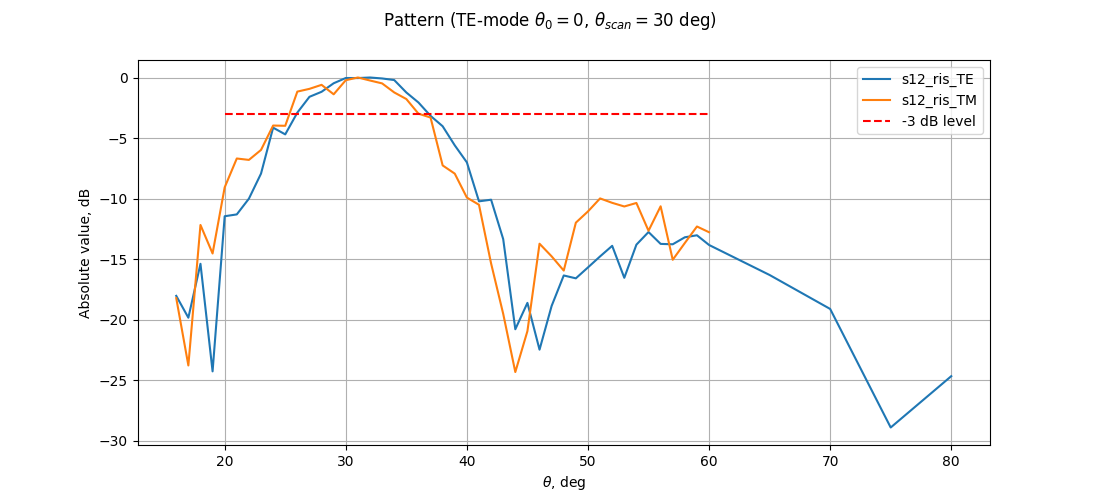

In [32]:
fig1 = plt.figure(figsize=(11,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(data_8A_TE['Angle'], 20*np.log10(data_8A_TE['s12_norm'].apply(abs)), label='s12_ris_TE')
ax_1.plot(data_8A_TM['Angle'], 20*np.log10(data_8A_TM['s12_norm'].apply(abs)), label='s12_ris_TM')
ax_1.plot([20, 60], [-3, -3], linestyle='--', color='r', label='-3 dB level')
ax_1.set_xlabel(r'$\theta$, deg')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig1.suptitle(r'Pattern (TE-mode $\theta_0=0$, $\theta_{scan}=30$ deg)')
plt.show()

In [31]:
data_8A_TE['s12-s12_free']=data_8A_TE['s12'] - data_free_TE['s12']
data_8A_TM['s12-s12_free']=data_8A_TM['s12'] - data_free_TM['s12']

max_new_TE = np.max(np.abs(data_8A_TE['s12-s12_free']))
max_new_TM = np.max(np.abs(data_8A_TM['s12-s12_free']))

data_8A_TE['s12-s12_free_norm'] = data_8A_TE['s12-s12_free'] / max_new_TE
data_8A_TM['s12-s12_free_norm'] = data_8A_TM['s12-s12_free'] / max_new_TM

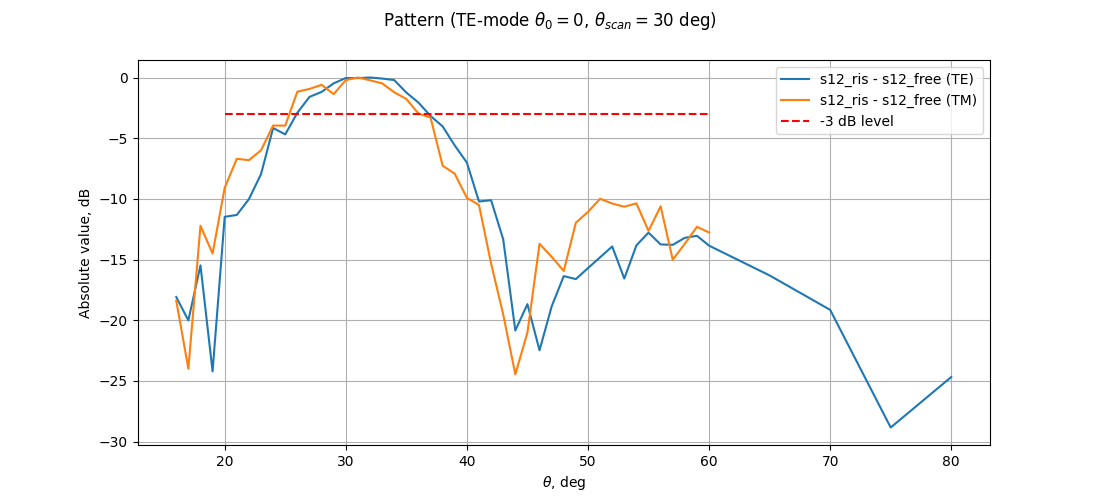

In [33]:
fig2 = plt.figure(figsize=(11,5))

ax_1 = fig2.add_subplot(111)
ax_1.plot(data_8A_TE['Angle'], 20*np.log10(data_8A_TE['s12-s12_free_norm'].apply(abs)), label='s12_ris - s12_free (TE)')
ax_1.plot(data_8A_TM['Angle'], 20*np.log10(data_8A_TM['s12-s12_free_norm'].apply(abs)), label='s12_ris - s12_free (TM)')
ax_1.plot([20, 60], [-3, -3], linestyle='--', color='r', label='-3 dB level')
ax_1.set_xlabel(r'$\theta$, deg')
ax_1.set_ylabel('Absolute value, dB')
ax_1.legend()
ax_1.grid()


fig2.suptitle(r'Pattern (TE-mode $\theta_0=0$, $\theta_{scan}=30$ deg)')
plt.show()

### Импорт данных из CST

In [ ]:
cst_pattern = pd.read_csv('D_struct_0deg_farfield_TE.txt', sep=' ', header=None, skiprows=2,
                            skipinitialspace=True, index_col=False,
                            names=['theta', 'absP'], usecols=[0, 2])

In [ ]:
cst_pattern.head()

In [ ]:
max_power = cst_pattern.absP.max()
cst_pattern['normP_dB'] = 10 * np.log10(cst_pattern['absP'] / max_power)
cst_pattern.head()

In [ ]:
# np.sum(np.isnan(cst_pattern['normP_dB']))

In [ ]:
fig1 = plt.figure(figsize=(11,5))

ax_1 = fig1.add_subplot(111)
ax_1.plot(cst_pattern['theta'], cst_pattern['normP_dB'], label='TE')
ax_1.set_xlabel(r'$\theta$, deg')
ax_1.set_ylabel(r'$\dfrac{P(\theta)}{P_{max}}$')
ax_1.legend()
ax_1.grid()


fig1.suptitle('CST Pattern')
plt.show()

In [ ]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(cst_pattern['theta']*np.pi/180, cst_pattern['normP_dB'], label='TE')
ax.set_rlabel_position(-10)  # Move radial labels away from plotted line
ax.legend(loc=(1, 1))
ax.grid(True)
ax.set_title("Scattering pattern", va='bottom');
plt.show()